# Moving Averages - Monthly Forescast

### Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
from sklearn.metrics import mean_squared_error as MSE  
from sklearn.metrics import mean_absolute_error as MAD  
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score as R2  
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sm  

## Monthly Forescast

### Data

In [2]:
np.random.seed(42)  # For reproducibility

# Create a date range (8 years of monthly data)
date_range = pd.date_range(start='2016-01-01', end='2024-12-01', freq='MS')

# Create a time series with trend and seasonality
demand = 100 + np.linspace(0, 50, len(date_range)) + 10 * np.sin(np.linspace(0, 12 * np.pi, len(date_range))) + np.random.normal(0, 5, len(date_range))

# Build DataFrame
df = pd.DataFrame({'Demand': demand}, index=date_range)
df.index.name = 'Month'

### Information of Data

In [3]:
df.describe()

,Demand
count,108.000000
mean,124.487864
std,16.323579
min,86.595521
25%,113.348142
50%,125.211363
75%,136.231727
max,155.512801


### Plot 

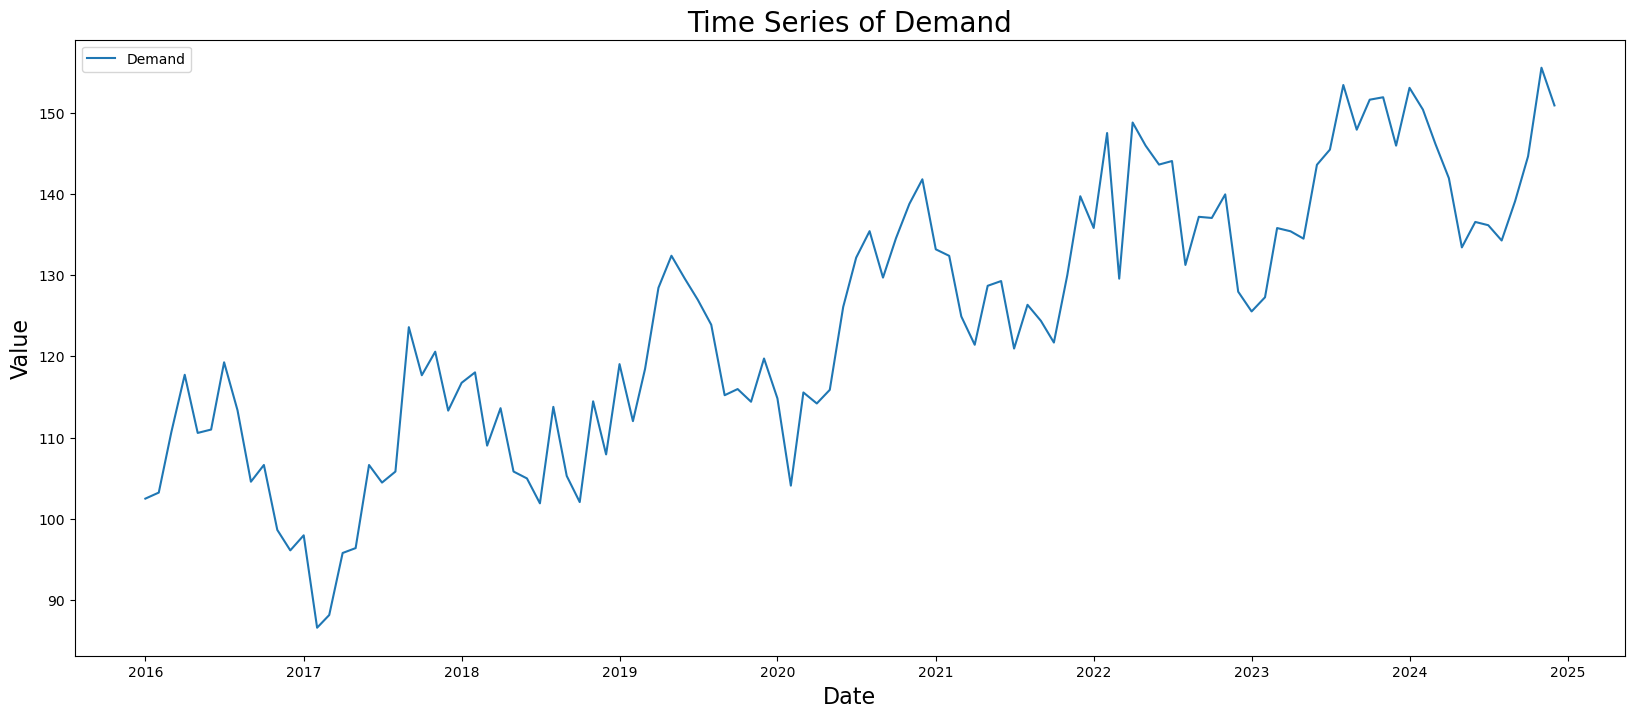

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], label='Demand')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Time Series of Demand', fontsize=20)
plt.legend()
plt.show()

### Ljung-Box Test for randomness

In [5]:
ljung_box = sm.stats.acorr_ljungbox(df['Demand'], lags=[14], return_df=True)
print("\nLjung-Box Test Result:\n", ljung_box)


Ljung-Box Test Result:
        lb_stat      lb_pvalue
14  625.353566  2.127291e-124


### Moving Average Forecast (Window = 3)

In [6]:
window = 3
df['MovingAverage'] = df['Demand'].rolling(window=window).mean().shift(1)  # Shift to avoid look-ahead bias

### Plot observed vs forecast

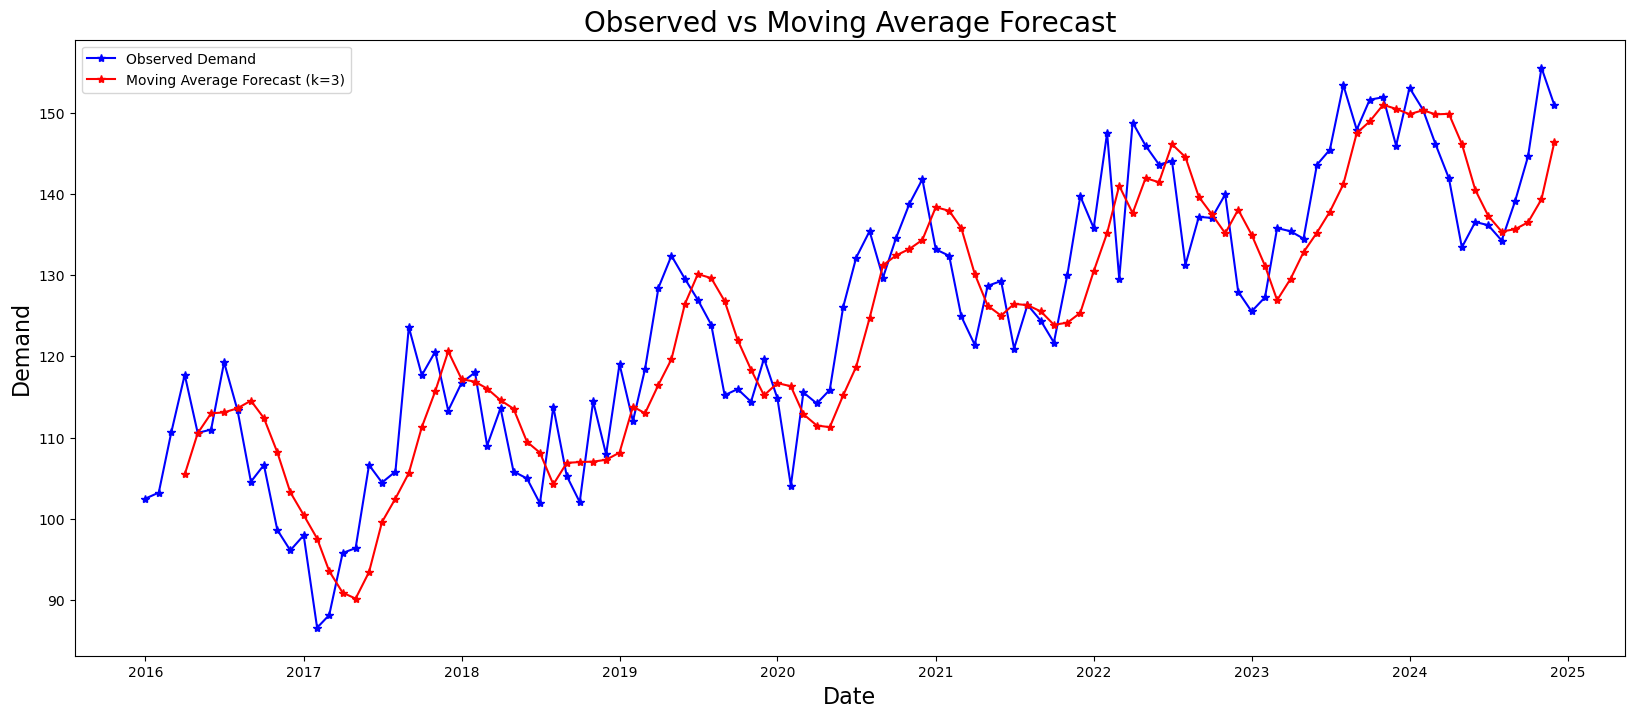

In [7]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], '-*', color='blue', label='Observed Demand')
plt.plot(df['MovingAverage'], '-*', color='red', label='Moving Average Forecast (k=3)')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Demand', fontsize=16)
plt.title('Observed vs Moving Average Forecast', fontsize=20)
plt.legend(loc='best')
plt.show()

### Calculate Errors

In [8]:
valid_range = df['Demand'][window:], df['MovingAverage'][window:]
mse = MSE(*valid_range)
mape = MAPE(*valid_range)
mad = MAD(*valid_range)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")


Mean Squared Error (MSE): 52.98
Mean Absolute Percentage Error (MAPE): 4.86%
Mean Absolute Deviation (MAD): 5.98


### Forecast future values

In [9]:
last_values = df['Demand'][-window:].tolist()
future_forecasts = []
for i in range(3):  # Forecast next 3 months
    next_forecast = np.mean(last_values[-window:])  # Moving average of the last "window" values
    future_forecasts.append(next_forecast)
    last_values.append(next_forecast)  # Add forecast to rolling list for next iteration

# Create future date index
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')

### Combine fitted values with forecast

In [10]:
pred_combined = pd.DataFrame({'Forecast': future_forecasts}, index=future_dates)

### Plot combined forecast

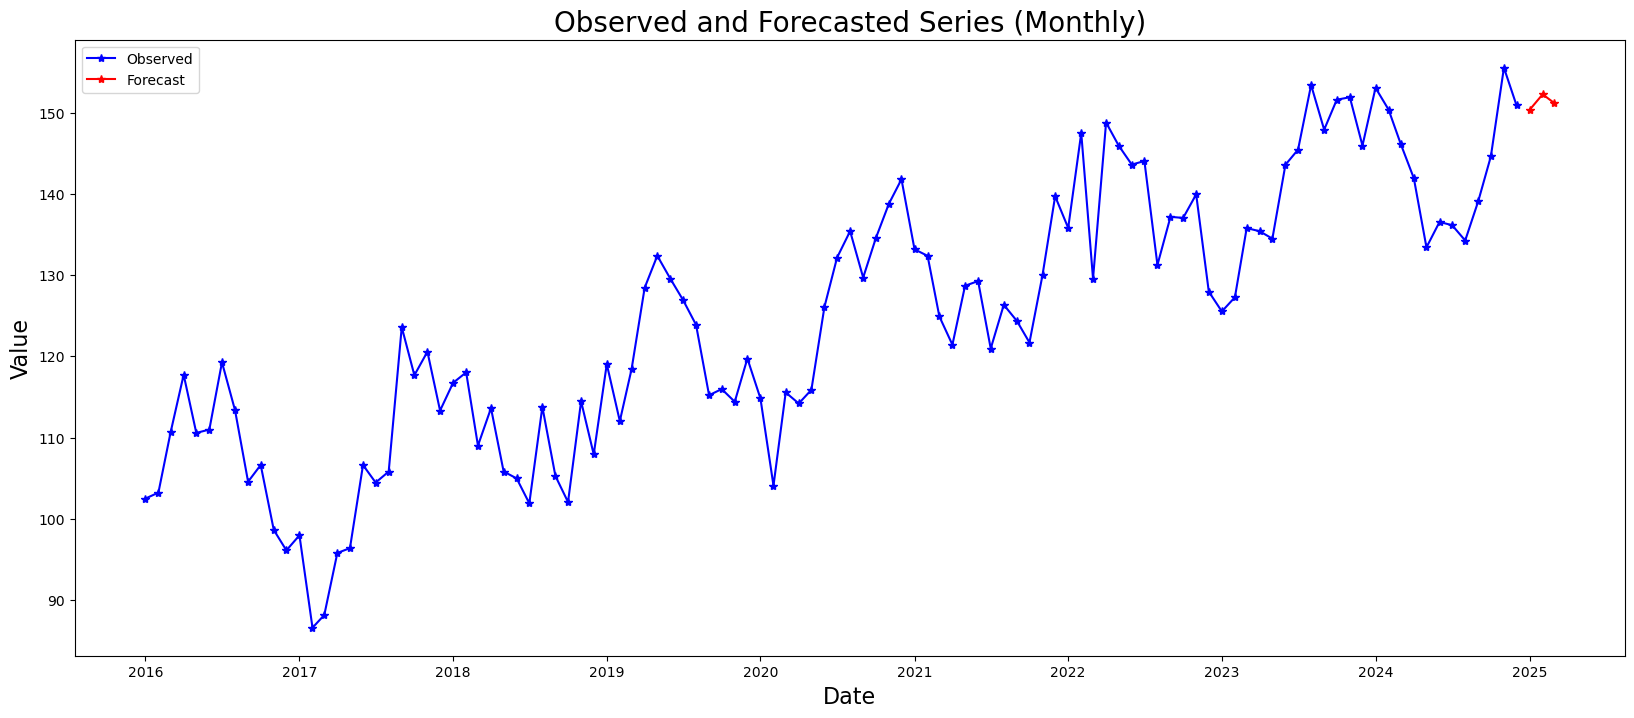

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], '-*', color='blue', label='Observed')
plt.plot(pred_combined, '-*', color='red', label='Forecast')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Observed and Forecasted Series (Monthly)', fontsize=20)
plt.legend(loc='best')
plt.show()

In [14]:
print("\nFuture Forecast for Next 3 Months:\n")
print(pred_combined)


Future Forecast for Next 3 Months:

              Forecast
2025-01-01  150.331215
2025-02-01  152.238968
2025-03-01  151.147691
